In [3]:
import pandas as pd
# import lightgbm as lgb
# import xgboost as xgb
# from catboost import CatBoostClassifier, Pool
from metrics import  accuracy
import numpy as np
import matplotlib.cm
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel, RFE, VarianceThreshold, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC

from sklearn.feature_extraction.text import CountVectorizer
from final_model_training import *

# from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=RuntimeWarning) 
simplefilter("ignore", category=UserWarning)

## Data Load ##

In [4]:
RANDOM_STATE = 42

x_train_path = "./../../data/x_train.txt"
y_train_path = "./../../data/y_train.txt"

x_test_path = "./../../data/x_test.txt"


X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
X_real_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


/tmp/ipykernel_1667/1583141569.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
/tmp/ipykernel_1667/1583141569.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
/tmp/ipykernel_1667/1583141569.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_real_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


## Grid search ##

In [4]:
cv = 5

model_grid_params = [
    {
        "model": QuadraticDiscriminantAnalysis,
        "params": [{}]
                
    },  
]


In [5]:
results_dict = run_grid_search_cv(feature_selector_grid_params, model_grid_params, X, y, profit_scoring)

Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=1)
scores: [930, 1070, 1110, 930, 850]
features: [[289], [300], [387], [168], [373]]
Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=3)
scores: [840, 860, 850, 840, 730]
features: [[47, 289, 333], [191, 192, 300], [168, 387, 441], [168, 267, 478], [120, 373, 491]]
Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=5)
scores: [710, 810, 670, 900, 760]
features: [[47, 58, 80, 289, 333], [52, 191, 192, 300, 408], [74, 168, 387, 395, 441], [168, 176, 267, 478, 486], [49, 120, 373, 476, 491]]
Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=1)
scores: [930, 920, 970, 930, 890]
features: [[172], [22], [451], [168], [49]]
Running on: QuadraticDi

In [3]:
resaults_dict = {"RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=1)": {'QuadraticDiscriminantAnalysis()': {'scores': [930,
    1070,
    1110,
    930,
    850],
   'features': [[289], [300], [387], [168], [373]]}},
 "RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=3)": {'QuadraticDiscriminantAnalysis()': {'scores': [840,
    860,
    850,
    840,
    730],
   'features': [[47, 289, 333],
    [191, 192, 300],
    [168, 387, 441],
    [168, 267, 478],
    [120, 373, 491]]}},
 "RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=5)": {'QuadraticDiscriminantAnalysis()': {'scores': [710,
    810,
    670,
    900,
    760],
   'features': [[47, 58, 80, 289, 333],
    [52, 191, 192, 300, 408],
    [74, 168, 387, 395, 441],
    [168, 176, 267, 478, 486],
    [49, 120, 373, 476, 491]]}},
 "RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=1)": {'QuadraticDiscriminantAnalysis()': {'scores': [930,
    920,
    970,
    930,
    890],
   'features': [[172], [22], [451], [168], [49]]}},
 "RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=3)": {'QuadraticDiscriminantAnalysis()': {'scores': [880,
    890,
    960,
    860,
    880],
   'features': [[58, 172, 447],
    [22, 434, 475],
    [168, 451, 467],
    [168, 267, 459],
    [39, 49, 467]]}},
 "RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=5)": {'QuadraticDiscriminantAnalysis()': {'scores': [840,
    880,
    830,
    830,
    890],
   'features': [[58, 172, 264, 289, 447],
    [22, 143, 431, 434, 475],
    [18, 168, 451, 467, 494],
    [168, 267, 408, 419, 459],
    [39, 49, 208, 467, 484]]}},
 "RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=1)": {'QuadraticDiscriminantAnalysis()': {'scores': [940,
    880,
    820,
    1010,
    950],
   'features': [[19], [269], [74], [30], [28]]}},
 "RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=3)": {'QuadraticDiscriminantAnalysis()': {'scores': [980,
    810,
    880,
    970,
    790],
   'features': [[19, 447, 465],
    [52, 269, 486],
    [18, 74, 473],
    [30, 168, 266],
    [28, 225, 231]]}},
 "RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=5)": {'QuadraticDiscriminantAnalysis()': {'scores': [870,
    810,
    850,
    850,
    740],
   'features': [[19, 47, 170, 447, 465],
    [52, 269, 431, 475, 486],
    [18, 74, 451, 467, 473],
    [30, 168, 266, 267, 459],
    [28, 225, 231, 298, 484]]}},
 "RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=1)": {'QuadraticDiscriminantAnalysis()': {'scores': [1010,
    880,
    970,
    1010,
    950],
   'features': [[465], [269], [451], [459], [67]]}},
 "RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=3)": {'QuadraticDiscriminantAnalysis()': {'scores': [800,
    810,
    930,
    970,
    860],
   'features': [[19, 47, 465],
    [52, 269, 486],
    [74, 451, 473],
    [266, 267, 459],
    [67, 231, 298]]}},
 "RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=5)": {'QuadraticDiscriminantAnalysis()': {'scores': [870,
    810,
    850,
    850,
    730],
   'features': [[19, 47, 170, 447, 465],
    [52, 269, 431, 475, 486],
    [18, 74, 451, 467, 473],
    [30, 168, 266, 267, 459],
    [49, 67, 231, 298, 484]]}}}

In [8]:
avg_results_dict = apply_transform_to_res(results_dict, np.mean)
avg_df = pd.DataFrame(avg_results_dict).T
#avg_df.columns = [
    # "XGBoost:n=100:max_feat=3","XGBoost:n=200:max_feat=3", "XGBoost:n=300:max_feat=3",
    # "XGBoost:n=100:max_feat=6","XGBoost:n=200:max_feat=6","XGBoost:n=300:max_feat=6",
    # "XGBoost:n=100:max_feat=9","XGBoost:n=200:max_feat=9","XGBoost:n=300:max_feat=9"]
avg_df.style.background_gradient(cmap="Greens", low=0, high=1, axis=None)

,QuadraticDiscriminantAnalysis()
"RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=1)",978.000000
"RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=3)",824.000000
"RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=5)",770.000000
"RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=1)",928.000000
"RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=3)",894.000000
"RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=5)",854.000000
"RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=1)",920.000000
"RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=3)",886.000000
"RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=5)",824.000000
"RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=1)",964.000000


In [13]:
for key in list(results_dict.keys()):
    print(results_dict[key]['QuadraticDiscriminantAnalysis()']['features'])

[[289], [300], [387], [168], [373]]
[[47, 289, 333], [191, 192, 300], [168, 387, 441], [168, 267, 478], [120, 373, 491]]
[[47, 58, 80, 289, 333], [52, 191, 192, 300, 408], [74, 168, 387, 395, 441], [168, 176, 267, 478, 486], [49, 120, 373, 476, 491]]
[[172], [22], [451], [168], [49]]
[[58, 172, 447], [22, 434, 475], [168, 451, 467], [168, 267, 459], [39, 49, 467]]
[[58, 172, 264, 289, 447], [22, 143, 431, 434, 475], [18, 168, 451, 467, 494], [168, 267, 408, 419, 459], [39, 49, 208, 467, 484]]
[[19], [269], [74], [30], [28]]
[[19, 447, 465], [52, 269, 486], [18, 74, 473], [30, 168, 266], [28, 225, 231]]
[[19, 47, 170, 447, 465], [52, 269, 431, 475, 486], [18, 74, 451, 467, 473], [30, 168, 266, 267, 459], [28, 225, 231, 298, 484]]
[[465], [269], [451], [459], [67]]
[[19, 47, 465], [52, 269, 486], [74, 451, 473], [266, 267, 459], [67, 231, 298]]
[[19, 47, 170, 447, 465], [52, 269, 431, 475, 486], [18, 74, 451, 467, 473], [30, 168, 266, 267, 459], [49, 67, 231, 298, 484]]


/tmp/ipykernel_1506/1108168634.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


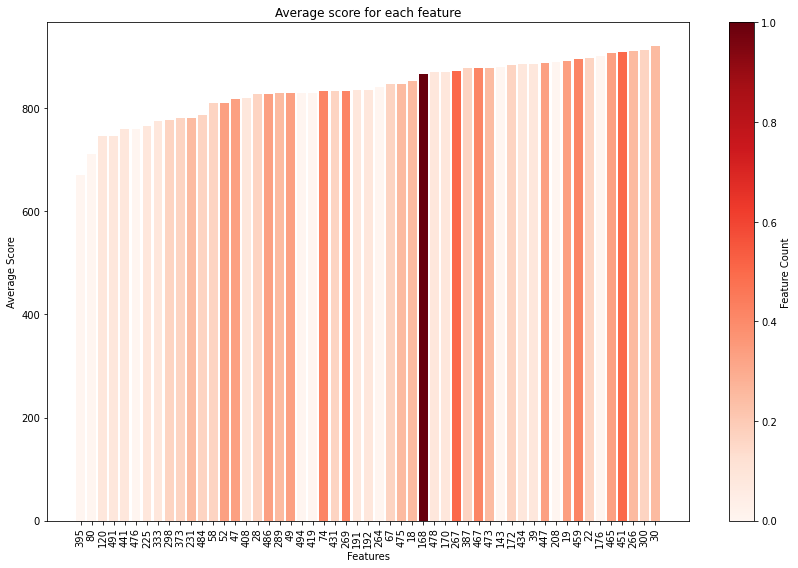

In [36]:
import numpy as np
import matplotlib.pyplot as plt

flat_features = list(itertools.chain.from_iterable(itertools.chain.from_iterable(resaults_dict[key]['QuadraticDiscriminantAnalysis()']['features'] for key in results_dict)))

feature_counts = Counter(map(str, flat_features))
feature_scores = {feature: {"total": 0, "count": 0} for feature in feature_counts.keys()}

for selector_str in results_dict:
    for model_str in results_dict[selector_str]:
        for features, score in zip(results_dict[selector_str][model_str]["features"], results_dict[selector_str][model_str]["scores"]):
            for feature in features:
                feature_scores[str(feature)]["total"] += score
                feature_scores[str(feature)]["count"] += 1

feature_avg_scores = {feature: scores["total"] / scores["count"] for feature, scores in feature_scores.items()}

feature_avg_scores_sorted = dict(sorted(feature_avg_scores.items(), key=lambda item: item[1]))

sorted_counts = [feature_counts[feature] for feature in feature_avg_scores_sorted.keys()]

counts = np.array(sorted_counts)
normalized_counts = (counts - counts.min()) / (counts.max() - counts.min())

cmap = plt.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.bar(feature_avg_scores_sorted.keys(), feature_avg_scores_sorted.values(), color=cmap(normalized_counts))
plt.xlabel('Features')
plt.ylabel('Average Score')
plt.title('Average score for each feature')
plt.xticks(rotation='vertical')
plt.tight_layout()

fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label='Feature Count')  # Add a colorbar
plt.show()

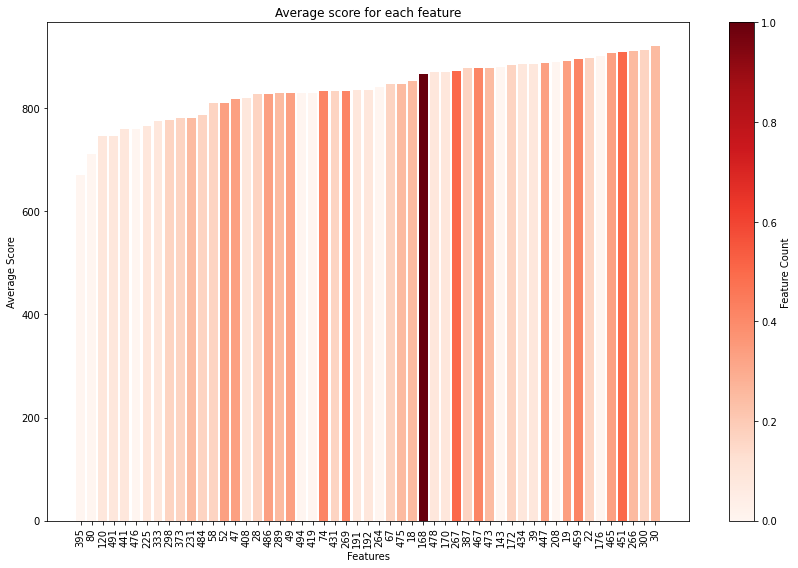

In [4]:
create_feature_score_plot(resaults_dict)

## First dumb try ##

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [8]:

selected_features = []
max_profit = 0

for feature in X_train.columns:
    selected_features.append(feature)
    
    model = RandomForestClassifier(random_state=RANDOM_STATE)
    model.fit(X_train[selected_features], y_train)
    
    y_pred = model.predict(X_test[selected_features])
    y_pred = y_pred%2
    correct_predictions = ((y_pred == 1) & list((y_test == 1)[0])).sum()
    profit = correct_predictions * 10 - len(selected_features) * 200
    
    if profit > max_profit:
        max_profit = profit

    else:
        selected_features.remove(feature)

print(selected_features)

[0]


In [9]:
max_profit

2610

In [10]:
y_test.sum()*10

0    5080
dtype: int64

### More analysis ###

<Axes: >

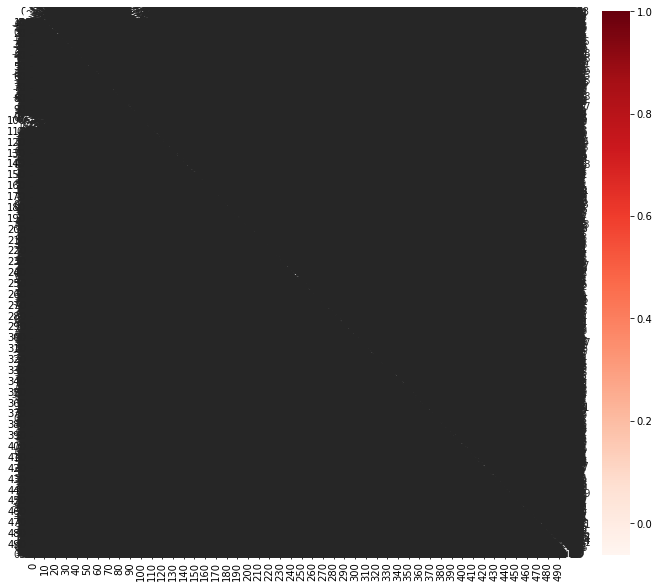

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

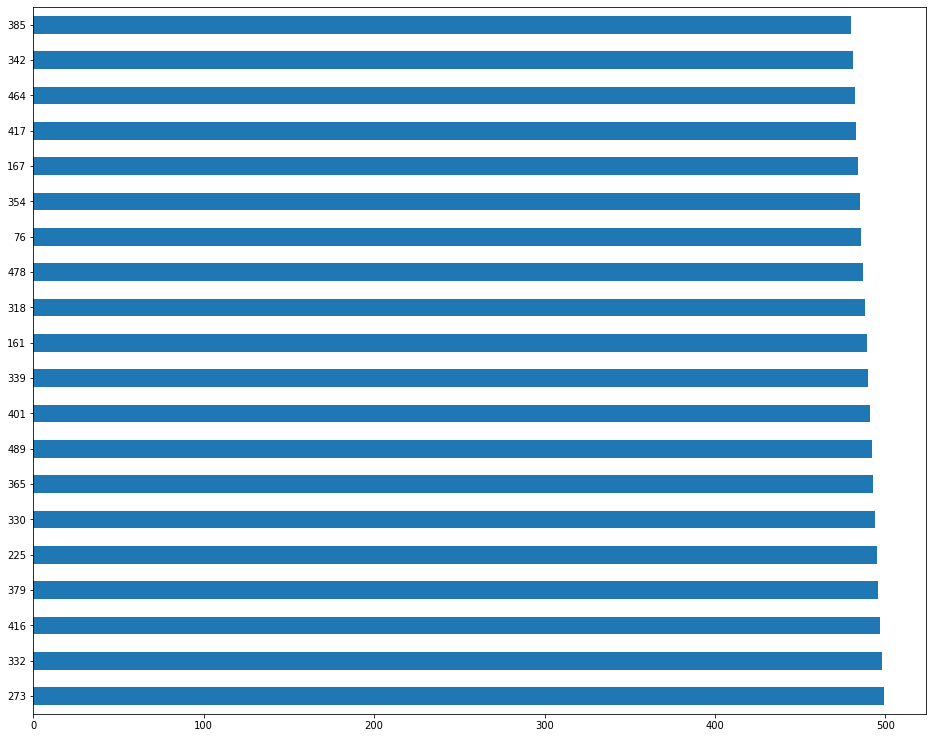

In [10]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

ranks = fisher_score.fisher_score(X.values, y.values.ravel())
plt.figure(figsize=(16, 13))
feat_importances = pd.Series(ranks, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

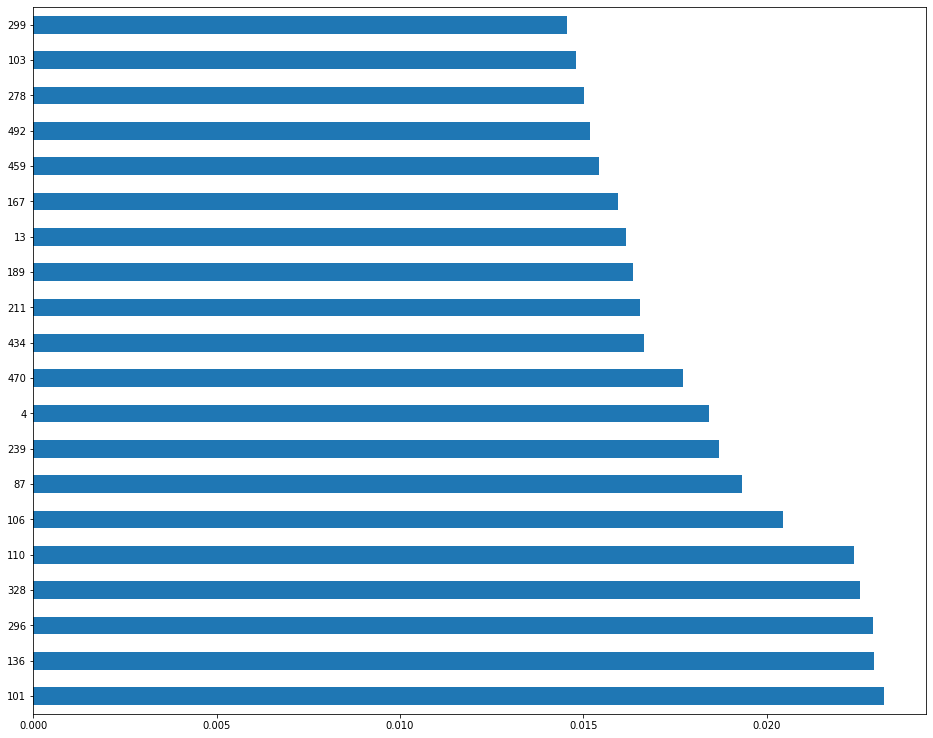

In [11]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y.values.ravel())
plt.figure(figsize=(16, 13))
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# One for each distribution #

In [3]:
first_200_X = X.iloc[:, :200]
second_200_X = X.iloc[:,200:400]
last_100_X = X.iloc[:, 400:]


In [6]:
cv = 5

model_grid_params = [
    {
        "model": QuadraticDiscriminantAnalysis,
        "params": [{}]
                
    },  
]
feature_selector_grid_params = [
    {
        "selector": SelectFromModel,
        "params": [{"estimator": i, "max_features": max_features} for i in [RandomForestClassifier()] for max_features in [1]]
    },
    {
        "selector": SelectKBest,
        "params": [{"k": i, "score_func": score_fnc} for i in [1] for score_fnc in [f_classif, mutual_info_classif]],
    },
    {
        "selector": RFE,
        "params": [{"estimator": i, "n_features_to_select":j, "step":1} for i in [SVC(kernel = 'linear',C = C, max_iter = 100)  for C in [100]] for j in [1]]
    }
    
]


In [7]:
results_dict_first_200 = run_grid_search_cv(feature_selector_grid_params, model_grid_params, first_200_X, y, profit_scoring, cv = cv)
results_dict_second_200 = run_grid_search_cv(feature_selector_grid_params, model_grid_params, second_200_X, y, profit_scoring, cv = cv)
results_dict_last_100 = run_grid_search_cv(feature_selector_grid_params, model_grid_params, last_100_X, y, profit_scoring, cv = cv)

Running on: QuadraticDiscriminantAnalysis() and SelectFromModel(estimator=RandomForestClassifier(), max_features=1)
scores: [1260, 1240, 1320, 1220, 1300]
features: [[105], [100], [105], [102], [102]]
Running on: QuadraticDiscriminantAnalysis() and SelectKBest(k=1)
scores: [940, 1070, 990, 1060, 950]
features: [[64], [155], [175], [64], [155]]
Running on: QuadraticDiscriminantAnalysis() and SelectKBest(k=1, score_func=<function mutual_info_classif at 0x7f2574c1db40>)
scores: [1260, 880, 970, 1360, 1270]
features: [[105], [110], [167], [101], [101]]
Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=1)
scores: [890, 900, 890, 1220, 1020]
features: [[43], [75], [41], [102], [77]]
Running on: QuadraticDiscriminantAnalysis() and SelectFromModel(estimator=RandomForestClassifier(), max_features=1)
scores: [840, 860, 1000, 910, 970]
features: [[276], [336], [395], [200], [220]]
Running on: QuadraticDiscriminantAnalysis

In [8]:
avg_results_dict = apply_transform_to_res(results_dict_first_200, np.mean)
avg_df = pd.DataFrame(avg_results_dict).T
avg_df.style.background_gradient(cmap="Greens", low=0, high=1, axis=None)

,QuadraticDiscriminantAnalysis()
"SelectFromModel(estimator=RandomForestClassifier(), max_features=1)",1268.000000
SelectKBest(k=1),1002.000000
"SelectKBest(k=1, score_func=)",1148.000000
"RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=1)",984.000000


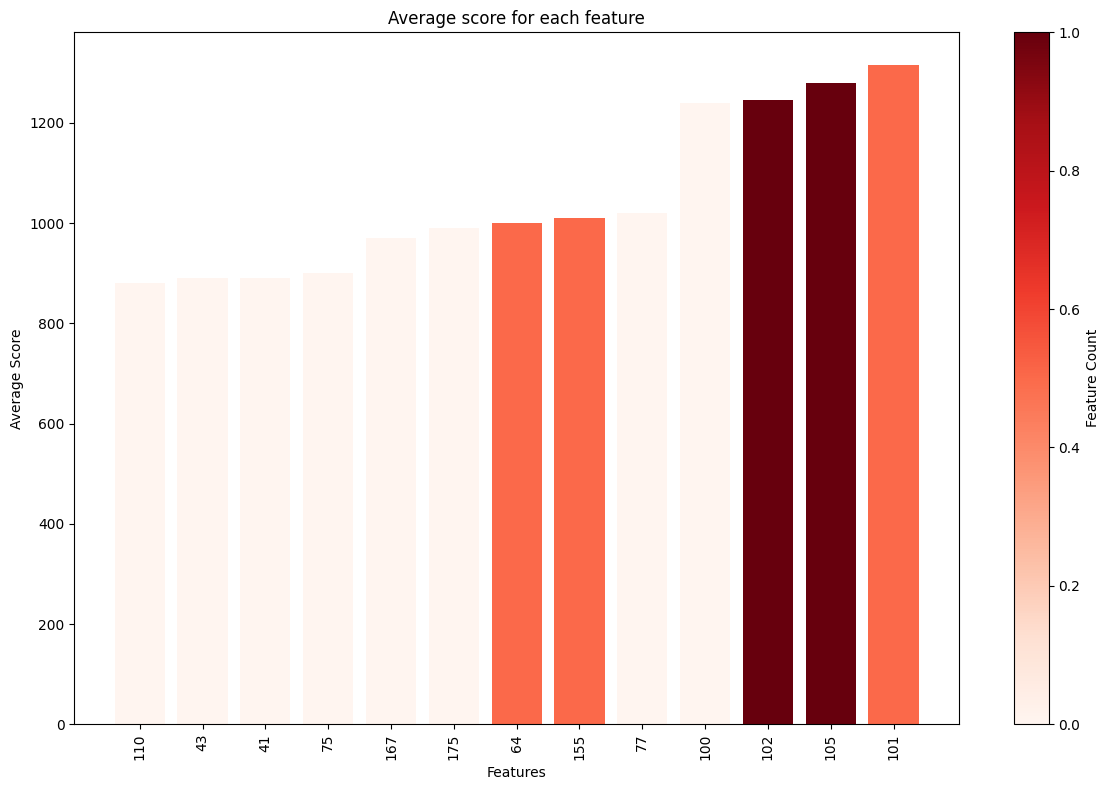

In [9]:
create_feature_score_plot(results_dict_first_200)

In [10]:
avg_results_dict = apply_transform_to_res(results_dict_second_200, np.mean)
avg_df = pd.DataFrame(avg_results_dict).T
avg_df.style.background_gradient(cmap="Greens", low=0, high=1, axis=None)

,QuadraticDiscriminantAnalysis()
"SelectFromModel(estimator=RandomForestClassifier(), max_features=1)",916.000000
SelectKBest(k=1),948.000000
"SelectKBest(k=1, score_func=)",956.000000
"RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=1)",916.000000


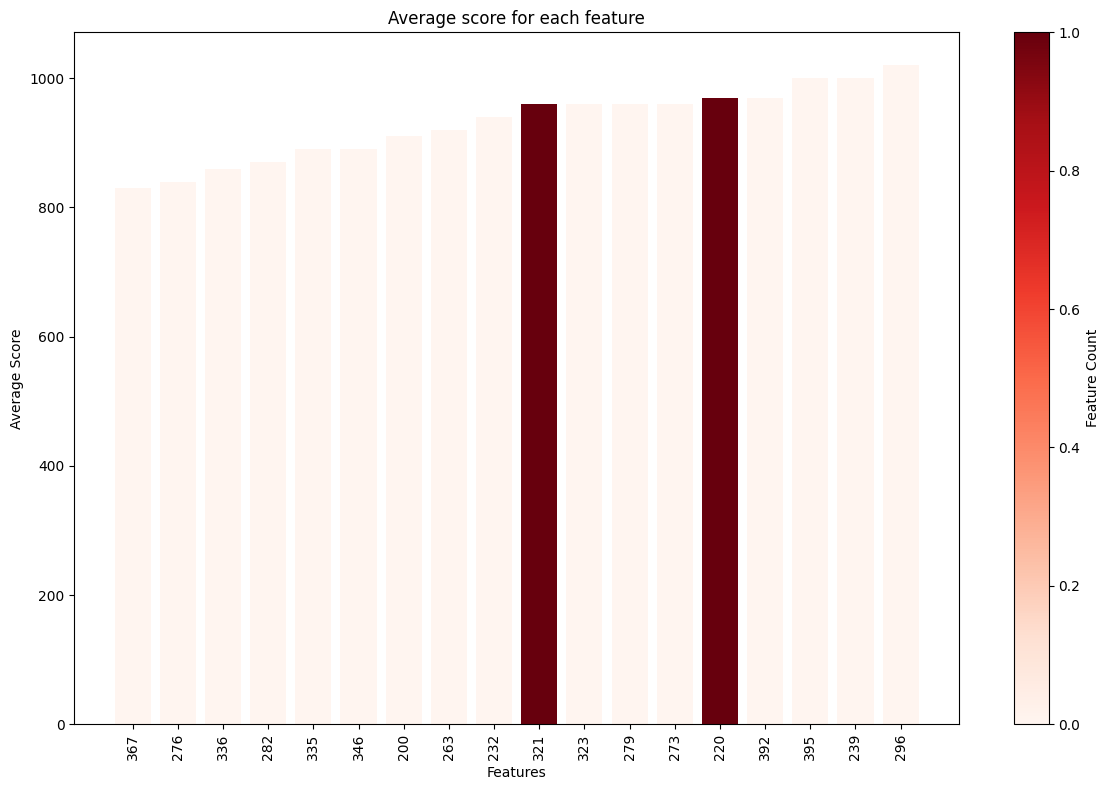

In [11]:
create_feature_score_plot(results_dict_second_200)

In [12]:
avg_results_dict = apply_transform_to_res(results_dict_last_100, np.mean)
avg_df = pd.DataFrame(avg_results_dict).T
avg_df.style.background_gradient(cmap="Greens", low=0, high=1, axis=None)

,QuadraticDiscriminantAnalysis()
"SelectFromModel(estimator=RandomForestClassifier(), max_features=1)",1004.000000
SelectKBest(k=1),994.000000
"SelectKBest(k=1, score_func=)",966.000000
"RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=1)",924.000000


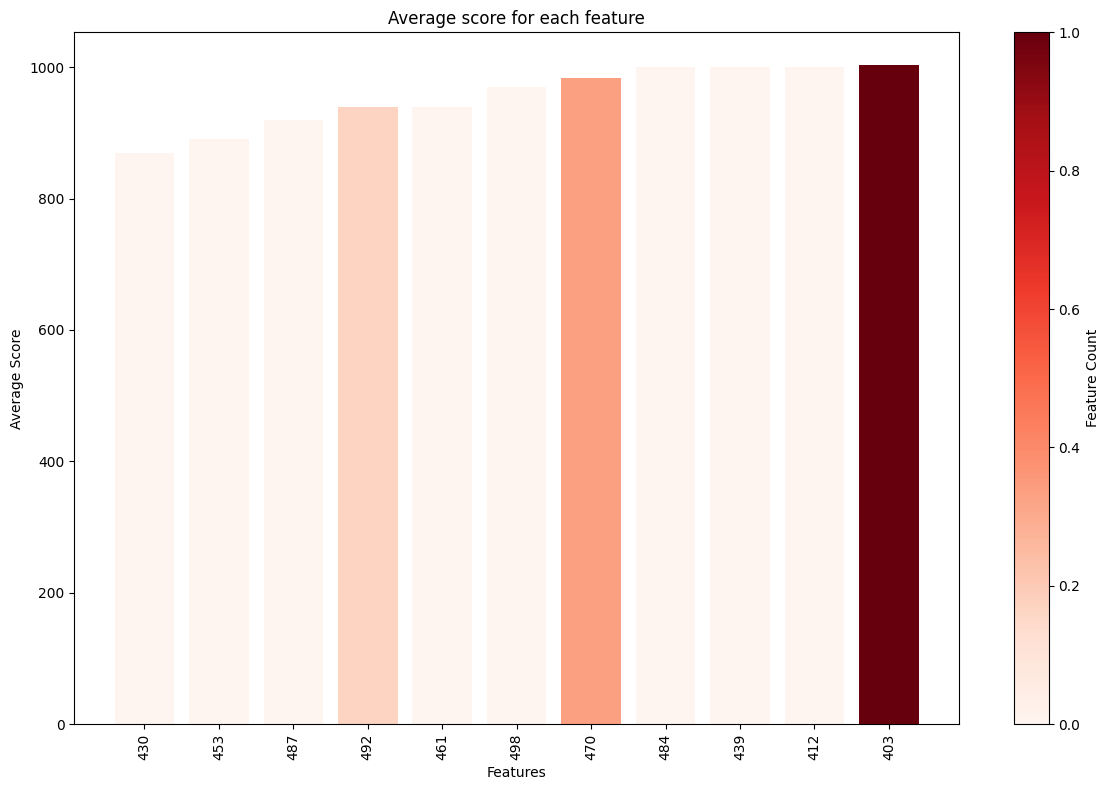

In [13]:
create_feature_score_plot(results_dict_last_100)

In [17]:
X_best = X[[105,220,403]] 

In [18]:
cv = 5

model_grid_params = [
    {
        "model": QuadraticDiscriminantAnalysis,
        "params": [{}]
                
    },  
]
feature_selector_grid_params = [
    {
        "selector": SelectKBest ,
        "params": [{"k":3}]
    },
]

In [19]:
run_grid_search_cv(feature_selector_grid_params,model_grid_params, X_best, y, profit_scoring)

Running on: QuadraticDiscriminantAnalysis() and SelectKBest(k=3)
scores: [1140, 1090, 1250, 1240, 1190]
features: [[105, 220, 403], [105, 220, 403], [105, 220, 403], [105, 220, 403], [105, 220, 403]]


{'SelectKBest(k=3)': {'QuadraticDiscriminantAnalysis()': {'scores': [1140,
    1090,
    1250,
    1240,
    1190],
   'features': [[105, 220, 403],
    [105, 220, 403],
    [105, 220, 403],
    [105, 220, 403],
    [105, 220, 403]]}}}

In [24]:
cv = 5

model_grid_params = [
    {
        "model": QuadraticDiscriminantAnalysis,
        "params": [{}]
    },  
]
feature_selector_grid_params = [
    {"selector": SelectKBest,
    "params": [{"k": i, "score_func": score_fnc} for i in [1,2,3] for score_fnc in [f_classif, mutual_info_classif]],
    },
    {"selector": SelectFromModel,
    "params": [{"estimator": i, "max_features": max_features} for i in [LogisticRegression(), RandomForestClassifier()] for max_features in [1,2,3]],#LogisticRegression(penalty="l1", solver="saga"),
    },
]


In [25]:
results_dict = run_grid_search_cv(feature_selector_grid_params,model_grid_params, X, y, profit_scoring)

Running on: QuadraticDiscriminantAnalysis() and SelectKBest(k=1)
scores: [890, 990, 960, 930, 950]
features: [[335], [403], [323], [321], [155]]
Running on: QuadraticDiscriminantAnalysis() and SelectKBest(k=1, score_func=<function mutual_info_classif at 0x7f2574c1db40>)
scores: [1260, 1000, 970, 960, 1270]
features: [[105], [239], [167], [279], [101]]
Running on: QuadraticDiscriminantAnalysis() and SelectKBest(k=2)
scores: [990, 980, 860, 930, 1040]
features: [[335, 403], [403, 489], [220, 323], [321, 498], [155, 403]]
Running on: QuadraticDiscriminantAnalysis() and SelectKBest(k=2, score_func=<function mutual_info_classif at 0x7f2574c1db40>)
scores: [1220, 960, 1000, 900, 1210]
features: [[105, 110], [110, 239], [167, 470], [279, 296], [101, 367]]
Running on: QuadraticDiscriminantAnalysis() and SelectKBest(k=3)
scores: [850, 940, 870, 880, 970]
features: [[285, 335, 403], [403, 458, 489], [220, 323, 403], [321, 339, 498], [64, 155, 403]]
Running on: QuadraticDiscriminantAnalysis() and

In [27]:
avg_results_dict = apply_transform_to_res(results_dict, np.mean)
avg_df = pd.DataFrame(avg_results_dict).T
avg_df.style.background_gradient(cmap="Greens", low=0, high=1, axis=None)

,QuadraticDiscriminantAnalysis()
SelectKBest(k=1),944.000000
"SelectKBest(k=1, score_func=)",1092.000000
SelectKBest(k=2),960.000000
"SelectKBest(k=2, score_func=)",1058.000000
SelectKBest(k=3),902.000000
"SelectKBest(k=3, score_func=)",1102.000000
"SelectFromModel(estimator=LogisticRegression(), max_features=1)",998.000000
"SelectFromModel(estimator=LogisticRegression(), max_features=2)",926.000000
"SelectFromModel(estimator=LogisticRegression(), max_features=3)",886.000000
"SelectFromModel(estimator=RandomForestClassifier(), max_features=1)",1232.000000


In [29]:
results_dict['SelectFromModel(estimator=RandomForestClassifier(), max_features=3)']

{'QuadraticDiscriminantAnalysis()': {'scores': [1320, 1310, 1390, 1370, 1430],
  'features': [[100, 102, 105],
   [100, 102, 105],
   [100, 103, 105],
   [100, 102, 105],
   [100, 102, 105]]}}

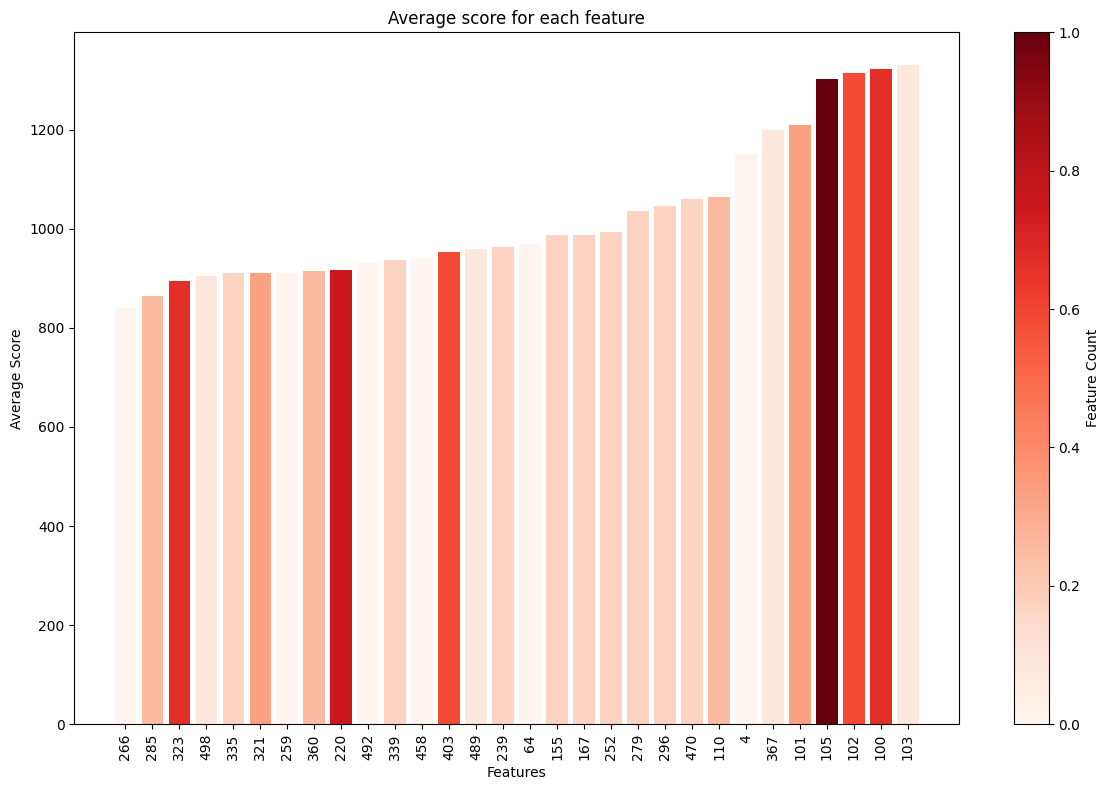

In [28]:
create_feature_score_plot(results_dict)

# 20 feature search #

In [12]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectPercentile, VarianceThreshold

model_grid_params = [
    {
        "model": QuadraticDiscriminantAnalysis,
        "params": [
            {
                "reg_param": reg, 
            }
            for reg in [0.0, 0.1, 0.2 ,0.3 ,0.4 ,0.5, 0.6,0.7,0.8,0.9,1.0]
        ]
    },
]

feature_selector_grid_params = [
    {
        "selector": SelectFromModel,
        "params": [{"estimator": model, "max_features":m} for m in [1,2,3] for model in [RandomForestClassifier(n_estimators=trees) for trees in [100, 200, 300,400,500]]]
    },
]

In [13]:
results_dict = run_grid_search_cv(feature_selector_grid_params, model_grid_params, X, y, profit_scoring)

Running on: QuadraticDiscriminantAnalysis() and SelectFromModel(estimator=RandomForestClassifier(), max_features=1)
scores: [1240, 1240, 1320, 1220, 1300]
features: [[100], [100], [105], [102], [102]]
Running on: QuadraticDiscriminantAnalysis(reg_param=0.1) and SelectFromModel(estimator=RandomForestClassifier(), max_features=1)
scores: [1240, 1320, 1290, 1220, 1300]
features: [[100], [102], [100], [102], [102]]
Running on: QuadraticDiscriminantAnalysis(reg_param=0.2) and SelectFromModel(estimator=RandomForestClassifier(), max_features=1)
scores: [1310, 1240, 1290, 1220, 1260]
features: [[102], [100], [100], [102], [102]]
Running on: QuadraticDiscriminantAnalysis(reg_param=0.3) and SelectFromModel(estimator=RandomForestClassifier(), max_features=1)
scores: [1230, 1150, 1080, 1220, 1270]
features: [[100], [105], [103], [102], [102]]
Running on: QuadraticDiscriminantAnalysis(reg_param=0.4) and SelectFromModel(estimator=RandomForestClassifier(), max_features=1)
scores: [1230, 1250, 1070, 1

In [14]:
avg_results_dict = apply_transform_to_res(results_dict, np.mean)
avg_df = pd.DataFrame(avg_results_dict).T
avg_df.style.background_gradient(cmap="Greens", low=0, high=1, axis=None)

,QuadraticDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(reg_param=0.1),QuadraticDiscriminantAnalysis(reg_param=0.2),QuadraticDiscriminantAnalysis(reg_param=0.3),QuadraticDiscriminantAnalysis(reg_param=0.4),QuadraticDiscriminantAnalysis(reg_param=0.5),QuadraticDiscriminantAnalysis(reg_param=0.6),QuadraticDiscriminantAnalysis(reg_param=0.7),QuadraticDiscriminantAnalysis(reg_param=0.8),QuadraticDiscriminantAnalysis(reg_param=0.9),QuadraticDiscriminantAnalysis(reg_param=1.0)
"SelectFromModel(estimator=RandomForestClassifier(), max_features=1)",1264.000000,1274.000000,1264.000000,1190.000000,1220.000000,1200.000000,1248.000000,1218.000000,1220.000000,1122.000000,1158.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=200), max_features=1)",1244.000000,1248.000000,1240.000000,1256.000000,1256.000000,1244.000000,1232.000000,1188.000000,1196.000000,1200.000000,1126.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=300), max_features=1)",1258.000000,1282.000000,1204.000000,1238.000000,1260.000000,1230.000000,1234.000000,1206.000000,1190.000000,1158.000000,1094.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=400), max_features=1)",1250.000000,1246.000000,1194.000000,1208.000000,1190.000000,1232.000000,1250.000000,1250.000000,1174.000000,1174.000000,1128.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=500), max_features=1)",1248.000000,1248.000000,1198.000000,1190.000000,1204.000000,1244.000000,1236.000000,1188.000000,1200.000000,1184.000000,1134.000000
"SelectFromModel(estimator=RandomForestClassifier(), max_features=2)",1308.000000,1330.000000,1332.000000,1284.000000,1312.000000,1286.000000,1308.000000,1314.000000,1318.000000,1238.000000,1072.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=200), max_features=2)",1318.000000,1292.000000,1286.000000,1286.000000,1266.000000,1262.000000,1306.000000,1284.000000,1258.000000,1190.000000,1104.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=300), max_features=2)",1270.000000,1324.000000,1294.000000,1286.000000,1260.000000,1284.000000,1262.000000,1292.000000,1258.000000,1242.000000,1066.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=400), max_features=2)",1282.000000,1284.000000,1272.000000,1284.000000,1288.000000,1288.000000,1294.000000,1292.000000,1236.000000,1216.000000,1060.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=500), max_features=2)",1282.000000,1300.000000,1274.000000,1268.000000,1260.000000,1264.000000,1278.000000,1292.000000,1252.000000,1214.000000,1070.000000


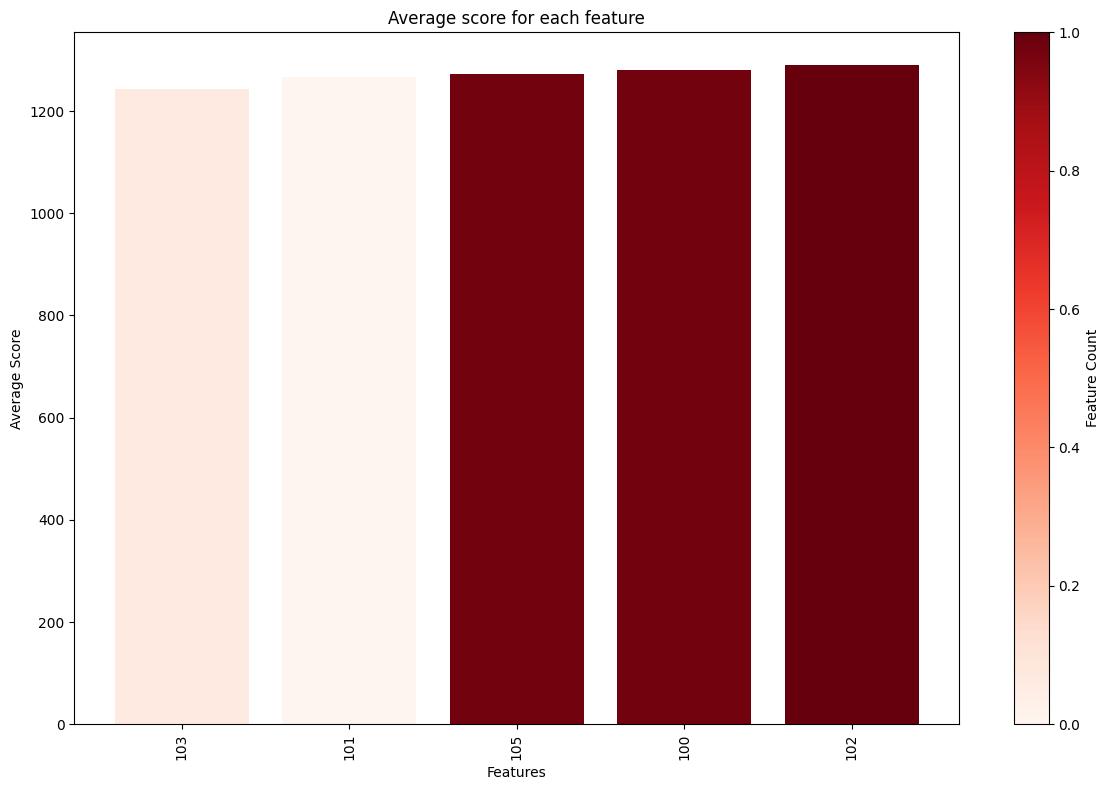

In [15]:
create_feature_score_plot(results_dict)

In [21]:
RANDOM_STATE = 42

x_train_path = "./../../data/x_train.txt"
y_train_path = "./../../data/y_train.txt"

x_test_path = "./../../data/x_test.txt"


X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
X_real_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


/tmp/ipykernel_19487/1583141569.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
/tmp/ipykernel_19487/1583141569.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
/tmp/ipykernel_19487/1583141569.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_real_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


In [25]:
X = X[[0,1,2,3,4,5,6,7,8,9,100,101,102,103,104,105,106,107,108,109]]
X

,0,1,2,3,4,5,6,7,8,9,100,101,102,103,104,105,106,107,108,109
0,-2.619773,-2.619533,-1.199350,-1.083335,-1.000910,-0.366967,-2.164037,-1.210001,-0.658311,-1.489539,-0.915513,0.713780,0.264032,-0.177042,-0.123621,1.049388,-0.715826,-0.997405,-0.553252,-1.646694
1,-1.415579,-1.782544,-2.880270,-1.958863,1.159968,0.273030,-1.628728,-0.175813,-0.916857,-0.570166,-1.513469,0.506429,1.071525,1.823868,0.083758,-1.191206,-2.039583,-0.442612,-0.723200,-0.266971
2,-2.745092,-1.382945,-1.626015,-1.282560,-0.663146,0.052349,-2.403322,-0.765073,-0.394354,-0.806624,-1.215839,-0.112797,-0.162820,0.771938,1.255190,-0.626576,0.269367,0.130045,-1.396269,-1.237523
3,0.618998,0.455364,-0.115081,0.649040,-0.862207,2.308504,0.526114,-1.094852,1.088656,-0.481210,1.167745,0.777688,-1.572364,0.211630,3.029617,0.861478,-1.415890,-0.059401,-1.001149,-0.182232
4,-0.070694,-0.550509,-0.565556,-0.693065,-0.573089,-0.395862,0.003170,-0.981609,-0.505775,-0.758430,0.219875,0.579971,0.702204,-0.455936,0.993229,-1.422561,-0.478544,-0.823916,-0.112448,0.488651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.106210,-1.958227,-2.073105,-0.827217,0.797188,-0.544141,-1.176375,0.577295,-1.037255,-0.691466,-1.115238,-0.041932,0.518670,0.816333,-2.106221,0.268827,-1.064242,-0.498189,1.150111,-1.017041
4996,-3.203265,-3.604215,-1.303455,-1.769853,-3.093612,-3.293880,-3.031679,-3.727836,-2.351449,-2.562465,-0.157643,0.098028,0.083440,-2.198985,-0.392815,0.025449,-0.103620,-0.437521,-1.440367,-0.377916
4997,-0.418994,-3.164231,-1.057789,-1.414368,0.495049,-1.455748,-1.530525,0.155972,-1.831778,-3.139882,0.412870,-1.730745,1.335438,-0.928147,-0.900783,0.473756,-1.761949,0.389069,0.726891,-1.310944
4998,2.291015,1.073697,0.071849,0.475785,1.203500,2.087545,2.393297,1.198370,0.695188,0.829632,0.406267,0.568479,-0.237090,1.129644,0.005900,1.023475,-1.576838,-1.351732,1.656580,0.536585


In [26]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectPercentile, VarianceThreshold

model_grid_params = [
    {
        "model": QuadraticDiscriminantAnalysis,
        "params": [
            {
                "reg_param": reg, 
            }
            for reg in [0.0, 0.1, 0.2 ,0.3 ,0.4 ,0.5]
        ]
    },
]

feature_selector_grid_params = [
    {
        "selector": SelectFromModel,
        "params": [{"estimator": model, "max_features":m} for m in [3] for model in [RandomForestClassifier(n_estimators=trees) for trees in [100, 200, 300]]]
    },
]

In [27]:
results_dict_20 = run_grid_search_cv(feature_selector_grid_params, model_grid_params, X, y, profit_scoring)

Running on: QuadraticDiscriminantAnalysis() and SelectFromModel(estimator=RandomForestClassifier(), max_features=3)
scores: [1320, 1310, 1410, 1370, 1430]
features: [[100, 102, 105], [100, 102, 105], [102, 103, 105], [100, 102, 105], [100, 102, 105]]
Running on: QuadraticDiscriminantAnalysis(reg_param=0.1) and SelectFromModel(estimator=RandomForestClassifier(), max_features=3)
scores: [1310, 1310, 1420, 1360, 1430]
features: [[100, 102, 105], [100, 102, 105], [102, 103, 105], [100, 102, 105], [100, 102, 105]]
Running on: QuadraticDiscriminantAnalysis(reg_param=0.2) and SelectFromModel(estimator=RandomForestClassifier(), max_features=3)
scores: [1310, 1310, 1400, 1360, 1440]
features: [[100, 102, 105], [100, 102, 105], [102, 103, 105], [100, 102, 105], [100, 102, 105]]
Running on: QuadraticDiscriminantAnalysis(reg_param=0.3) and SelectFromModel(estimator=RandomForestClassifier(), max_features=3)
scores: [1310, 1310, 1400, 1360, 1430]
features: [[100, 102, 105], [100, 102, 105], [102, 10

In [29]:
avg_results_dict = apply_transform_to_res(results_dict_20, np.mean)
avg_df = pd.DataFrame(avg_results_dict).T
avg_df.style.background_gradient(cmap="Greens", low=0, high=1, axis=None)

,QuadraticDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(reg_param=0.1),QuadraticDiscriminantAnalysis(reg_param=0.2),QuadraticDiscriminantAnalysis(reg_param=0.3),QuadraticDiscriminantAnalysis(reg_param=0.4),QuadraticDiscriminantAnalysis(reg_param=0.5)
"SelectFromModel(estimator=RandomForestClassifier(), max_features=3)",1368.000000,1366.000000,1364.000000,1362.000000,1380.000000,1354.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=200), max_features=3)",1372.000000,1368.000000,1370.000000,1362.000000,1370.000000,1354.000000
"SelectFromModel(estimator=RandomForestClassifier(n_estimators=300), max_features=3)",1368.000000,1366.000000,1364.000000,1362.000000,1370.000000,1354.000000


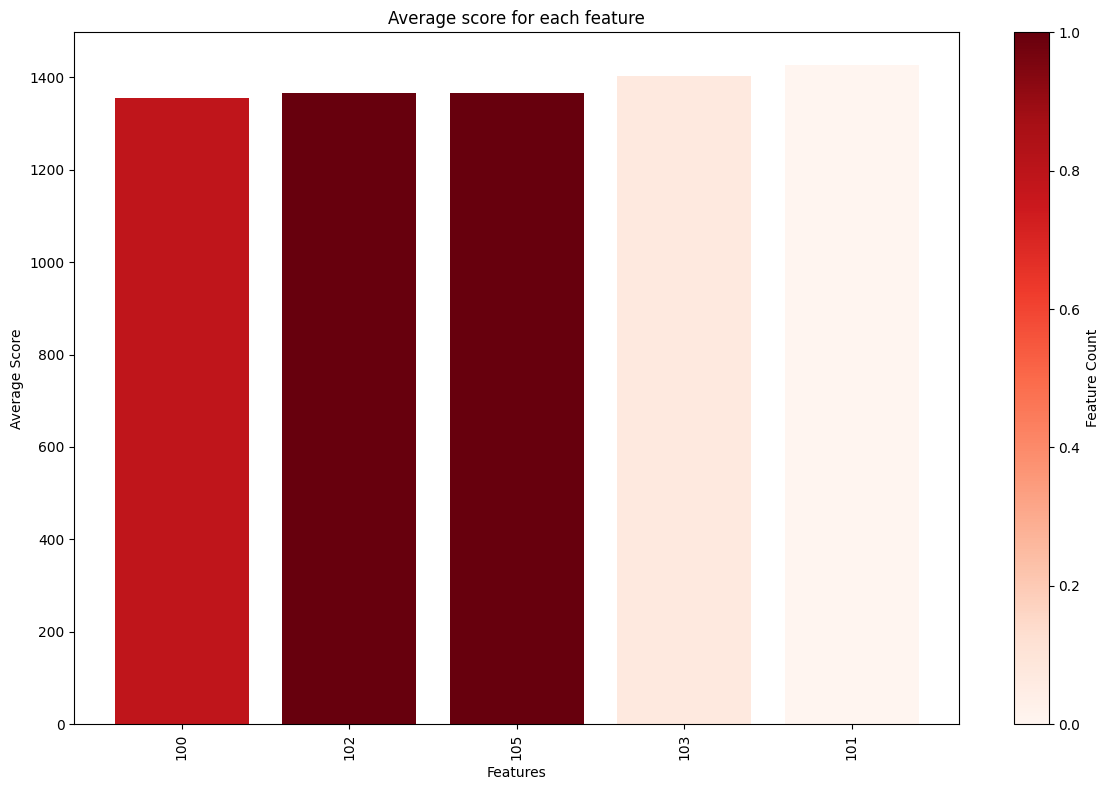

In [30]:
create_feature_score_plot(results_dict_20)